**Table of contents**<a id='toc0_'></a>    
- [Missing Values](#toc1_)    
- [Decision metrics](#toc2_)    
- [Source Page Metrics](#toc3_)    
- [Disclosed indicators](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
llama2 = pd.read_excel('./data/hm_llama2_topk8_paramsall.xlsx')
llama2.drop(["Unnamed: 0"], axis=1, inplace=True)

llama3 = pd.read_excel('./data/hm_llama3_instruct_topk8_paramsall.xlsx')
llama3.drop(["Unnamed: 0"], axis=1, inplace=True)

mistral = pd.read_excel('./data/hm_mistral_topk8_paramsall.xlsx')
mistral.drop(["Unnamed: 0"], axis=1, inplace=True)

phi3 = pd.read_excel('./data/hm_phi3_14b-instruct_topk8_paramsall.xlsx')
phi3.drop(["Unnamed: 0"], axis=1, inplace=True)

gpt = pd.read_excel('./data/hm_gpt-4o_topk8_paramsall.xlsx')
gpt.drop(["Unnamed: 0"], axis=1, inplace=True)

# <a id='toc1_'></a>[Missing Values](#toc0_)

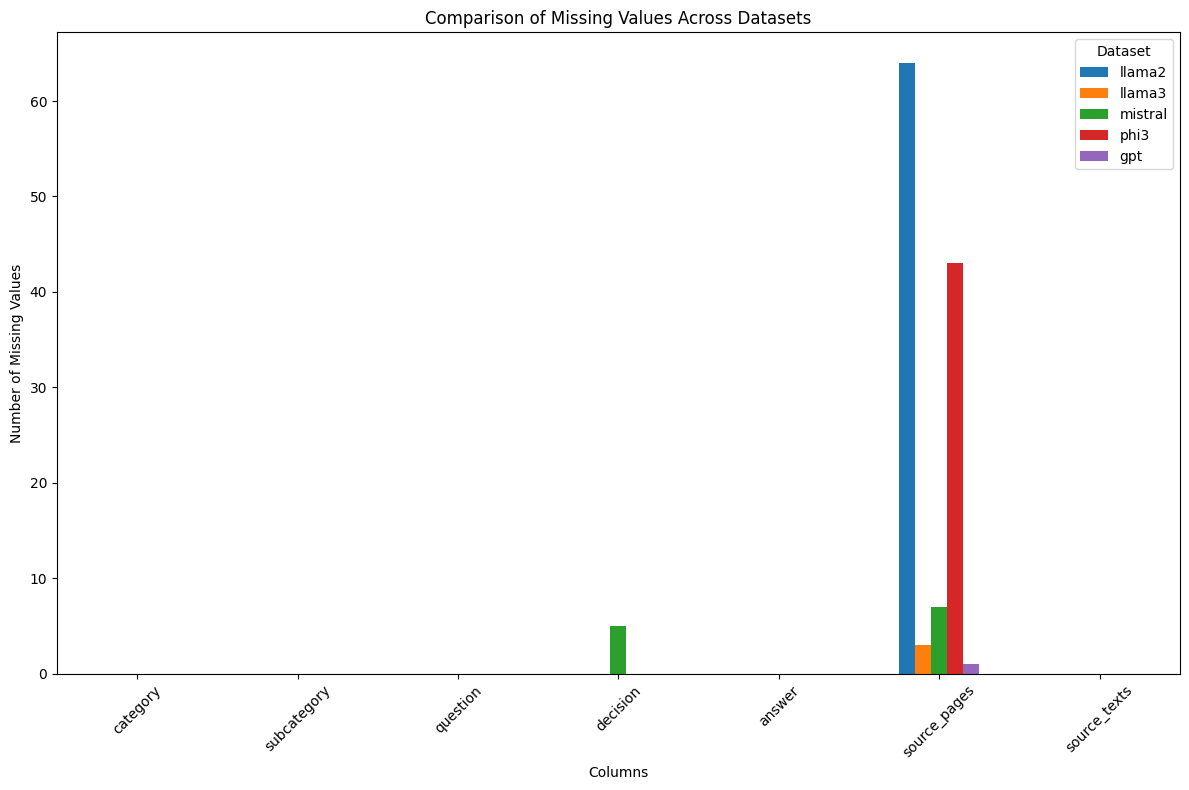

In [27]:
llama2_missing = llama2.isna().sum()
llama3_missing = llama3.isna().sum()
mistral_missing = mistral.isna().sum()
phi3_missing = phi3.isna().sum()
gpt_missing = gpt.isna().sum()


missing_comparison = pd.DataFrame({
    'llama2': llama2_missing,
    'llama3': llama3_missing,
    'mistral': mistral_missing,
    'phi3': phi3_missing,
    'gpt': gpt_missing
}).reset_index()

missing_comparison.columns = ['Column', 'llama2', 'llama3', 'mistral', 'phi3', "gpt"]

missing_comparison.plot(x='Column', kind='bar', figsize=(12, 8))
plt.title('Comparison of Missing Values Across Datasets')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()

llama2 fails to give a single source page

# <a id='toc2_'></a>[Decision metrics](#toc0_)

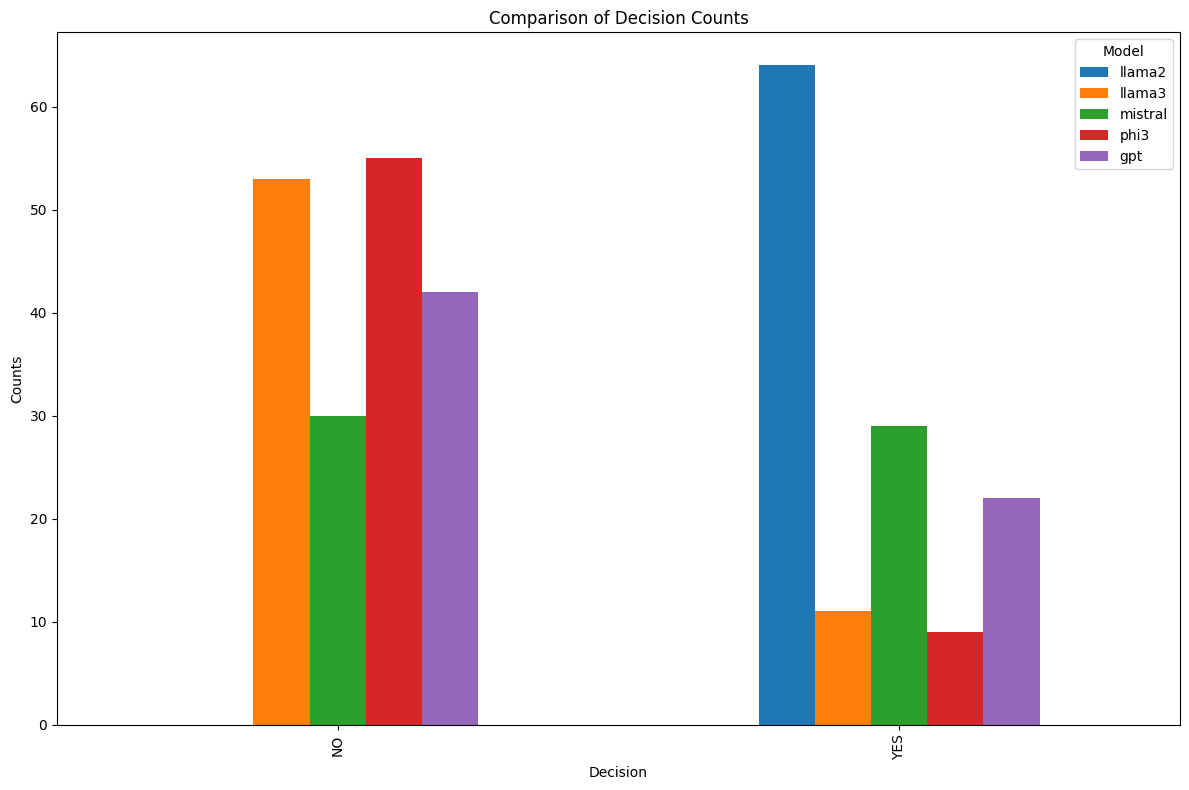

In [28]:

llama2_decision_counts = llama2['decision'].value_counts()
llama3_decision_counts = llama3['decision'].value_counts()
mistral_decision_counts = mistral['decision'].value_counts()
phi3_decision_counts = phi3['decision'].value_counts()
gpt_decision_counts = gpt['decision'].value_counts()


decision_comparison_df = pd.DataFrame({
    'llama2': llama2_decision_counts,
    'llama3': llama3_decision_counts,
    'mistral': mistral_decision_counts,
    'phi3': phi3_decision_counts,
    "gpt" : gpt_decision_counts
})

decision_comparison_df.plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of Decision Counts')
plt.xlabel('Decision')
plt.ylabel('Counts')
plt.legend(title='Model')
plt.tight_layout()
plt.savefig('./hm_comparison_decision.jpg')
plt.show()

In [29]:
mistral_missing_indices = mistral[mistral['decision'].isna()].index.tolist()
print("Indices of missing decisions in mistral:", mistral_missing_indices)
mistral_missing_entries = mistral.loc[mistral_missing_indices]
mistral_missing_entries.head(5)

Indices of missing decisions in mistral: [1, 10, 11, 16, 45]


,category,subcategory,question,decision,answer,source_pages,source_texts
1,target,headline,If the company communicates GHG emission inten...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 16: Until this wor...
10,target,offsetting,If carbon credits and offsets are reported to ...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 54: No new or amen...
11,target,offsetting,If carbon credits and offsets are reported to ...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 54: The contracts ...
16,governance,accountability,Does the company report how its board oversees...,NaN,See In Answer,NaN,"[BEGIN OF SOURCES]\n\nPAGE 38: In addition, a..."
45,tracking,emissions,Does the company report its scope 1 GHG emissi...,NaN,See In Answer,NaN,"[BEGIN OF SOURCES]\n\nPAGE 19: 839 7,93 6 7,4..."


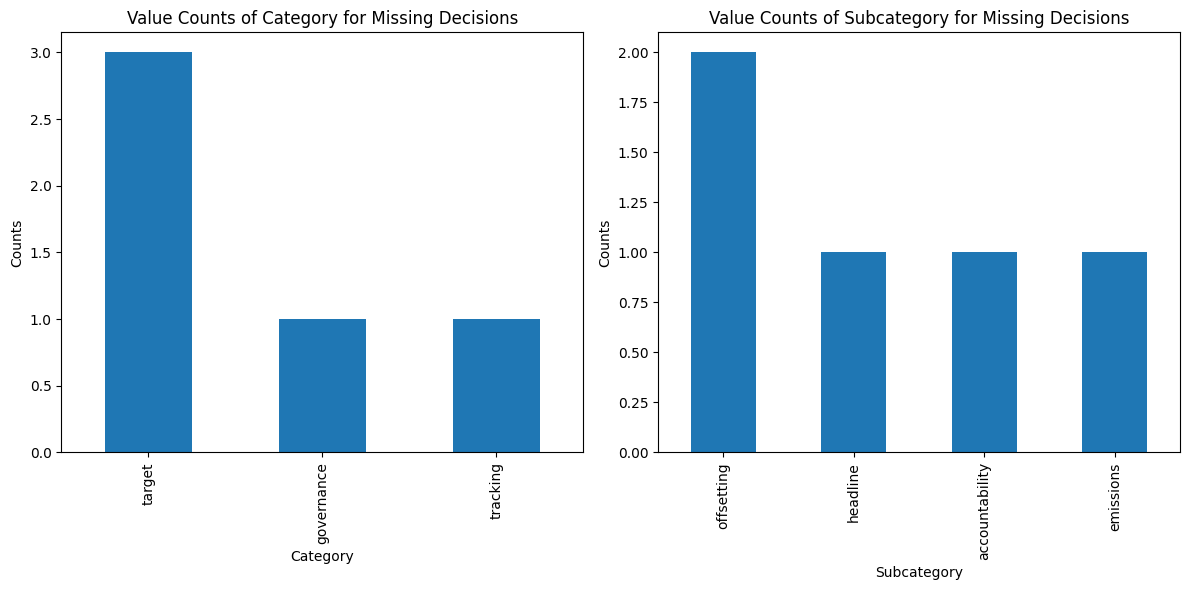

In [30]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
mistral_missing_entries['category'].value_counts().plot(kind='bar')
plt.title('Value Counts of Category for Missing Decisions')
plt.xlabel('Category')
plt.ylabel('Counts')

plt.subplot(1, 2, 2)
mistral_missing_entries['subcategory'].value_counts().plot(kind='bar')
plt.title('Value Counts of Subcategory for Missing Decisions')
plt.xlabel('Subcategory')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()

# <a id='toc3_'></a>[Source Page Metrics](#toc0_)

In [31]:
llama3_missing_source = llama3[llama3["source_pages"].isna()].index
mistral_missing_source = mistral[mistral["source_pages"].isna()].index
phi3_missing_source = phi3[phi3["source_pages"].isna()].index
gpt_missing_source = gpt[gpt["source_pages"].isna()].index

In [32]:
print(f"# missing source page entries for llama3: {len(llama3_missing_source)}")
print(f"# missing source page entries for mistral: {len(mistral_missing_source)}")
print(f"# missing source page entries for phi3: {len(phi3_missing_source)}")
print(f"# missing source page entries for gpt: {len(gpt_missing_source)}")

# missing source page entries for llama3: 3
# missing source page entries for mistral: 7
# missing source page entries for phi3: 43
# missing source page entries for gpt: 1


In [33]:
llama3.iloc[llama3_missing_source].sample(3)

,category,subcategory,question,decision,answer,source_pages,source_texts
26,strategy,production,Does the company report a strategy and activit...,NO,"Upon reviewing the report, I did not find spec...",NaN,[BEGIN OF SOURCES]\n\nPAGE 40: —Innovation : ...
7,target,coverage,Does the company report its absolute emission ...,NO,The company reports a combined target for scop...,NaN,"[BEGIN OF SOURCES]\n\nPAGE 19: 839 7,93 6 7,4..."
32,strategy,engagement,Does the company report a strategy with specif...,NO,The company does not report a specific strateg...,NaN,[BEGIN OF SOURCES]\n\nPAGE 42: packaging and ...


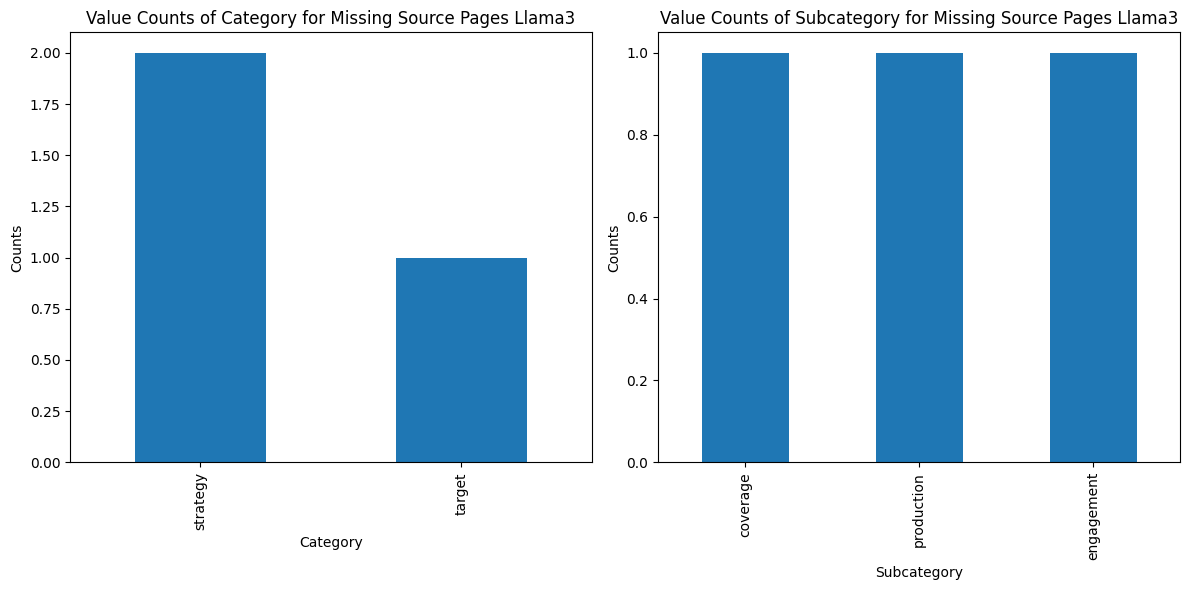

In [34]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
llama3.iloc[llama3_missing_source]['category'].value_counts().plot(kind='bar')
plt.title('Value Counts of Category for Missing Source Pages Llama3')
plt.xlabel('Category')
plt.ylabel('Counts')

plt.subplot(1, 2, 2)
llama3.iloc[llama3_missing_source]['subcategory'].value_counts().plot(kind='bar')
plt.title('Value Counts of Subcategory for Missing Source Pages Llama3')
plt.xlabel('Subcategory')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()

In [35]:
mistral.iloc[mistral_missing_source].sample(7)

,category,subcategory,question,decision,answer,source_pages,source_texts
1,target,headline,If the company communicates GHG emission inten...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 16: Until this wor...
10,target,offsetting,If carbon credits and offsets are reported to ...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 54: No new or amen...
45,tracking,emissions,Does the company report its scope 1 GHG emissi...,NaN,See In Answer,NaN,"[BEGIN OF SOURCES]\n\nPAGE 19: 839 7,93 6 7,4..."
16,governance,accountability,Does the company report how its board oversees...,NaN,See In Answer,NaN,"[BEGIN OF SOURCES]\n\nPAGE 38: In addition, a..."
11,target,offsetting,If carbon credits and offsets are reported to ...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 54: The contracts ...
35,strategy,engagement,Does the company report serious consequences a...,NO,The report does not provide specific informati...,NaN,[BEGIN OF SOURCES]\n\nPAGE 42: packaging and ...
37,strategy,fossil fuels,Does the company report a strategy and activit...,NO,The report does not provide evidence of a comm...,NaN,[BEGIN OF SOURCES]\n\nPAGE 22: We used prefer...


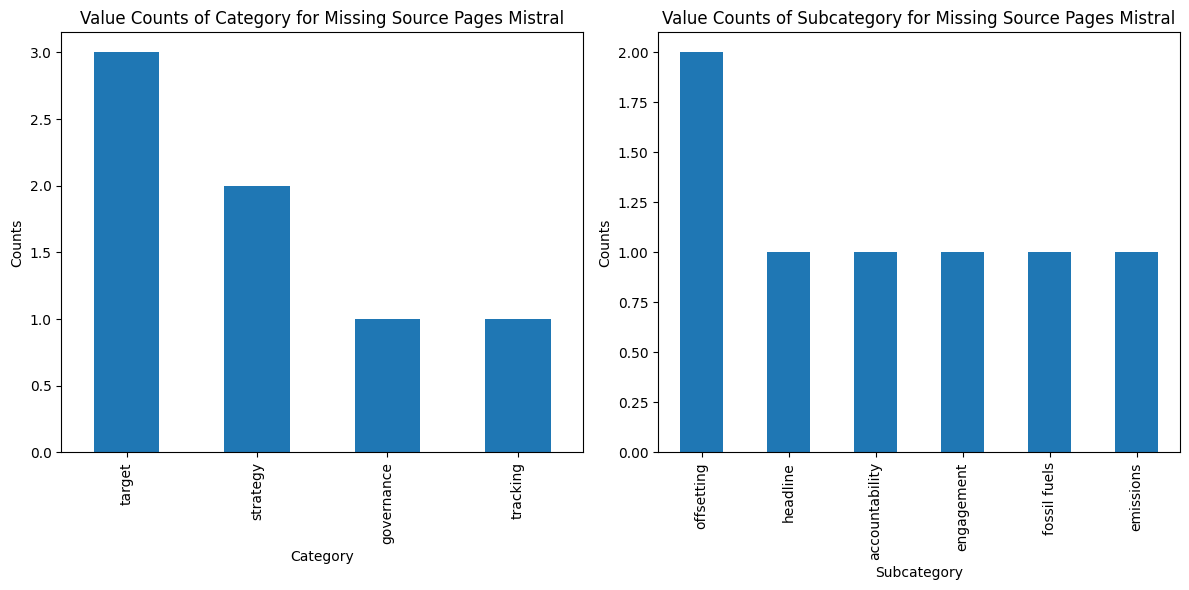

In [36]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
mistral.iloc[mistral_missing_source]['category'].value_counts().plot(kind='bar')
plt.title('Value Counts of Category for Missing Source Pages Mistral')
plt.xlabel('Category')
plt.ylabel('Counts')

plt.subplot(1, 2, 2)
mistral.iloc[mistral_missing_source]['subcategory'].value_counts().plot(kind='bar')
plt.title('Value Counts of Subcategory for Missing Source Pages Mistral')
plt.xlabel('Subcategory')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()

In [37]:
phi3.iloc[phi3_missing_source].sample(10)

,category,subcategory,question,decision,answer,source_pages,source_texts
39,strategy,just transition,Does the company report a strategy for a just...,NO,The provided sources do not contain specific d...,NaN,[BEGIN OF SOURCES]\n\nPAGE 42: packaging and ...
59,tracking,capex,Does the company report the amount of climate ...,NO,The company's report does not explicitly menti...,NaN,[BEGIN OF SOURCES]\n\nPAGE 20: —We developed ...
18,governance,incentives,Does the company provide a higher share of rem...,NO,The provided sources do not contain specific e...,NaN,[BEGIN OF SOURCES]\n\nPAGE 25: Levels of comp...
57,tracking,progress,Does the company report annual progress agains...,NO,The provided sources do not mention any specif...,NaN,[BEGIN OF SOURCES]\n\nPAGE 24: colleagues and...
33,strategy,engagement,Does the company report an engagement strategy...,NO,The company report does mention that they enga...,NaN,[BEGIN OF SOURCES]\n\nPAGE 18: Addressing imp...
28,strategy,planning,Does the company report its capex planning to ...,NO,The provided sources do not contain specific d...,NaN,[BEGIN OF SOURCES]\n\nPAGE 39: An innovative ...
37,strategy,fossil fuels,Does the company report a strategy and activit...,NO,The company's report does not provide specific...,NaN,[BEGIN OF SOURCES]\n\nPAGE 22: We used prefer...
60,tracking,revenues,Does the company report the amount of climate ...,NO,The company's report does not provide specific...,NaN,[BEGIN OF SOURCES]\n\nPAGE 42: packaging and ...
51,tracking,progress,Does the company report its absolute scope 2 G...,NO,The company's report does provide some data on...,NaN,"[BEGIN OF SOURCES]\n\nPAGE 19: 839 7,93 6 7,4..."
52,tracking,progress,Does the company report its absolute scope 3 G...,NO,The company's report does provide some data on...,NaN,"[BEGIN OF SOURCES]\n\nPAGE 19: 839 7,93 6 7,4..."


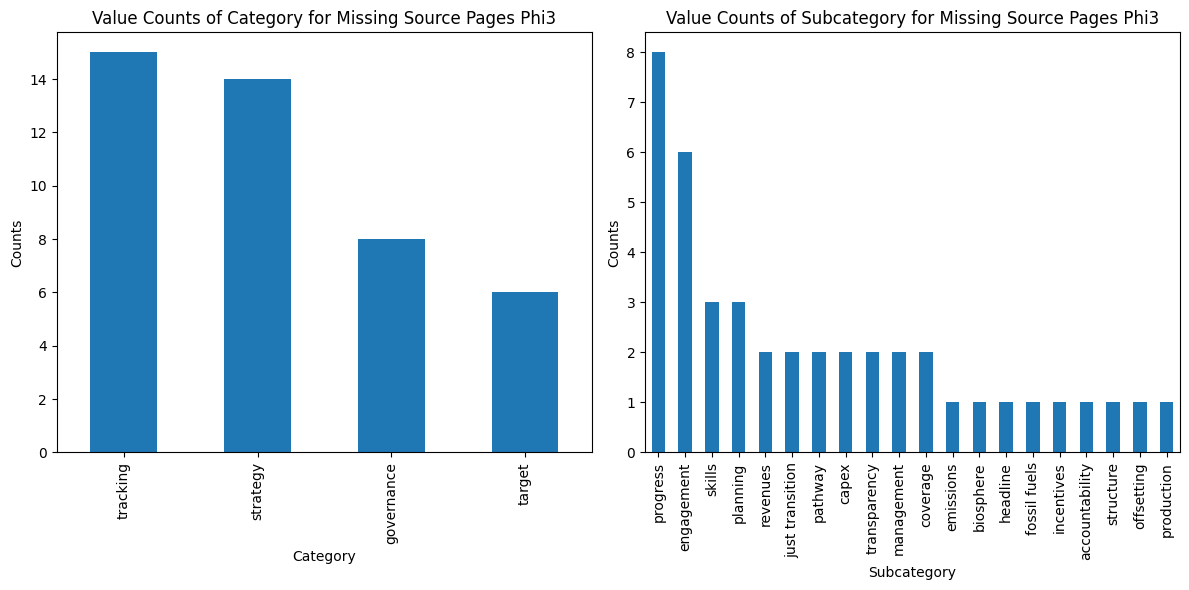

In [38]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
phi3.iloc[phi3_missing_source]['category'].value_counts().plot(kind='bar')
plt.title('Value Counts of Category for Missing Source Pages Phi3')
plt.xlabel('Category')
plt.ylabel('Counts')

plt.subplot(1, 2, 2)
phi3.iloc[phi3_missing_source]['subcategory'].value_counts().plot(kind='bar')
plt.title('Value Counts of Subcategory for Missing Source Pages Phi3')
plt.xlabel('Subcategory')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()

In [39]:
gpt.iloc[gpt_missing_source].sample(1)

,category,subcategory,question,decision,answer,source_pages,source_texts
63,tracking,engagement,Does the company report its engagement activit...,NO,[[NO]] The report does not provide any specifi...,NaN,[BEGIN OF SOURCES]\n\nPAGE 60: GROUP PARENT C...


In [40]:
overlap_all = set(llama3_missing_source).intersection(set(mistral_missing_source), set(phi3_missing_source))
overlap_llama3_mistral = set(llama3_missing_source).intersection(set(mistral_missing_source))
overlap_llama3_phi3 = set(llama3_missing_source).intersection(set(phi3_missing_source))
overlap_mistral_phi3 = set(mistral_missing_source).intersection(set(phi3_missing_source))

print("Values overlapping in all three lists:", overlap_all)
print("Values overlapping between llama3 and mistral:", overlap_llama3_mistral)
print("Values overlapping between llama3 and phi3:", overlap_llama3_phi3)
print("Values overlapping between mistral and phi3:", overlap_mistral_phi3)

Values overlapping in all three lists: set()
Values overlapping between llama3 and mistral: set()
Values overlapping between llama3 and phi3: {32, 26}
Values overlapping between mistral and phi3: {1, 10, 35, 37}


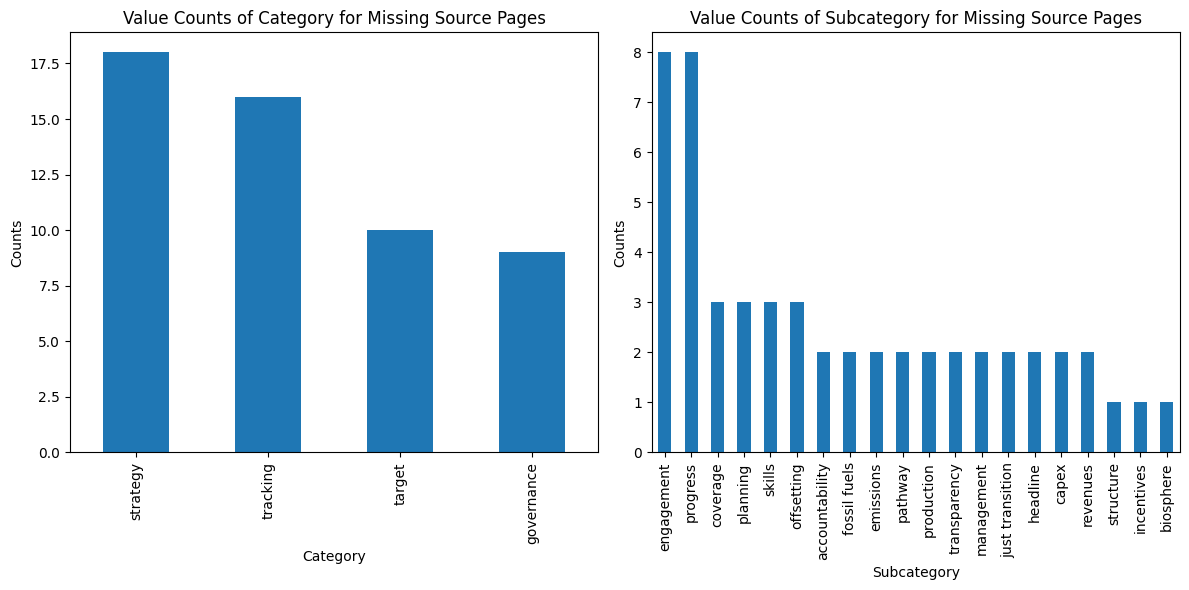

In [41]:
concatenated_missing_source_page = pd.concat([llama3.iloc[llama3_missing_source], mistral.iloc[mistral_missing_source], phi3.iloc[phi3_missing_source]], ignore_index=True)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
concatenated_missing_source_page['category'].value_counts().plot(kind='bar')
plt.title('Value Counts of Category for Missing Source Pages')
plt.xlabel('Category')
plt.ylabel('Counts')

plt.subplot(1, 2, 2)
concatenated_missing_source_page['subcategory'].value_counts().plot(kind='bar')
plt.title('Value Counts of Subcategory for Missing Source Pages')
plt.xlabel('Subcategory')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()

# <a id='toc4_'></a>[Disclosed indicators](#toc0_)

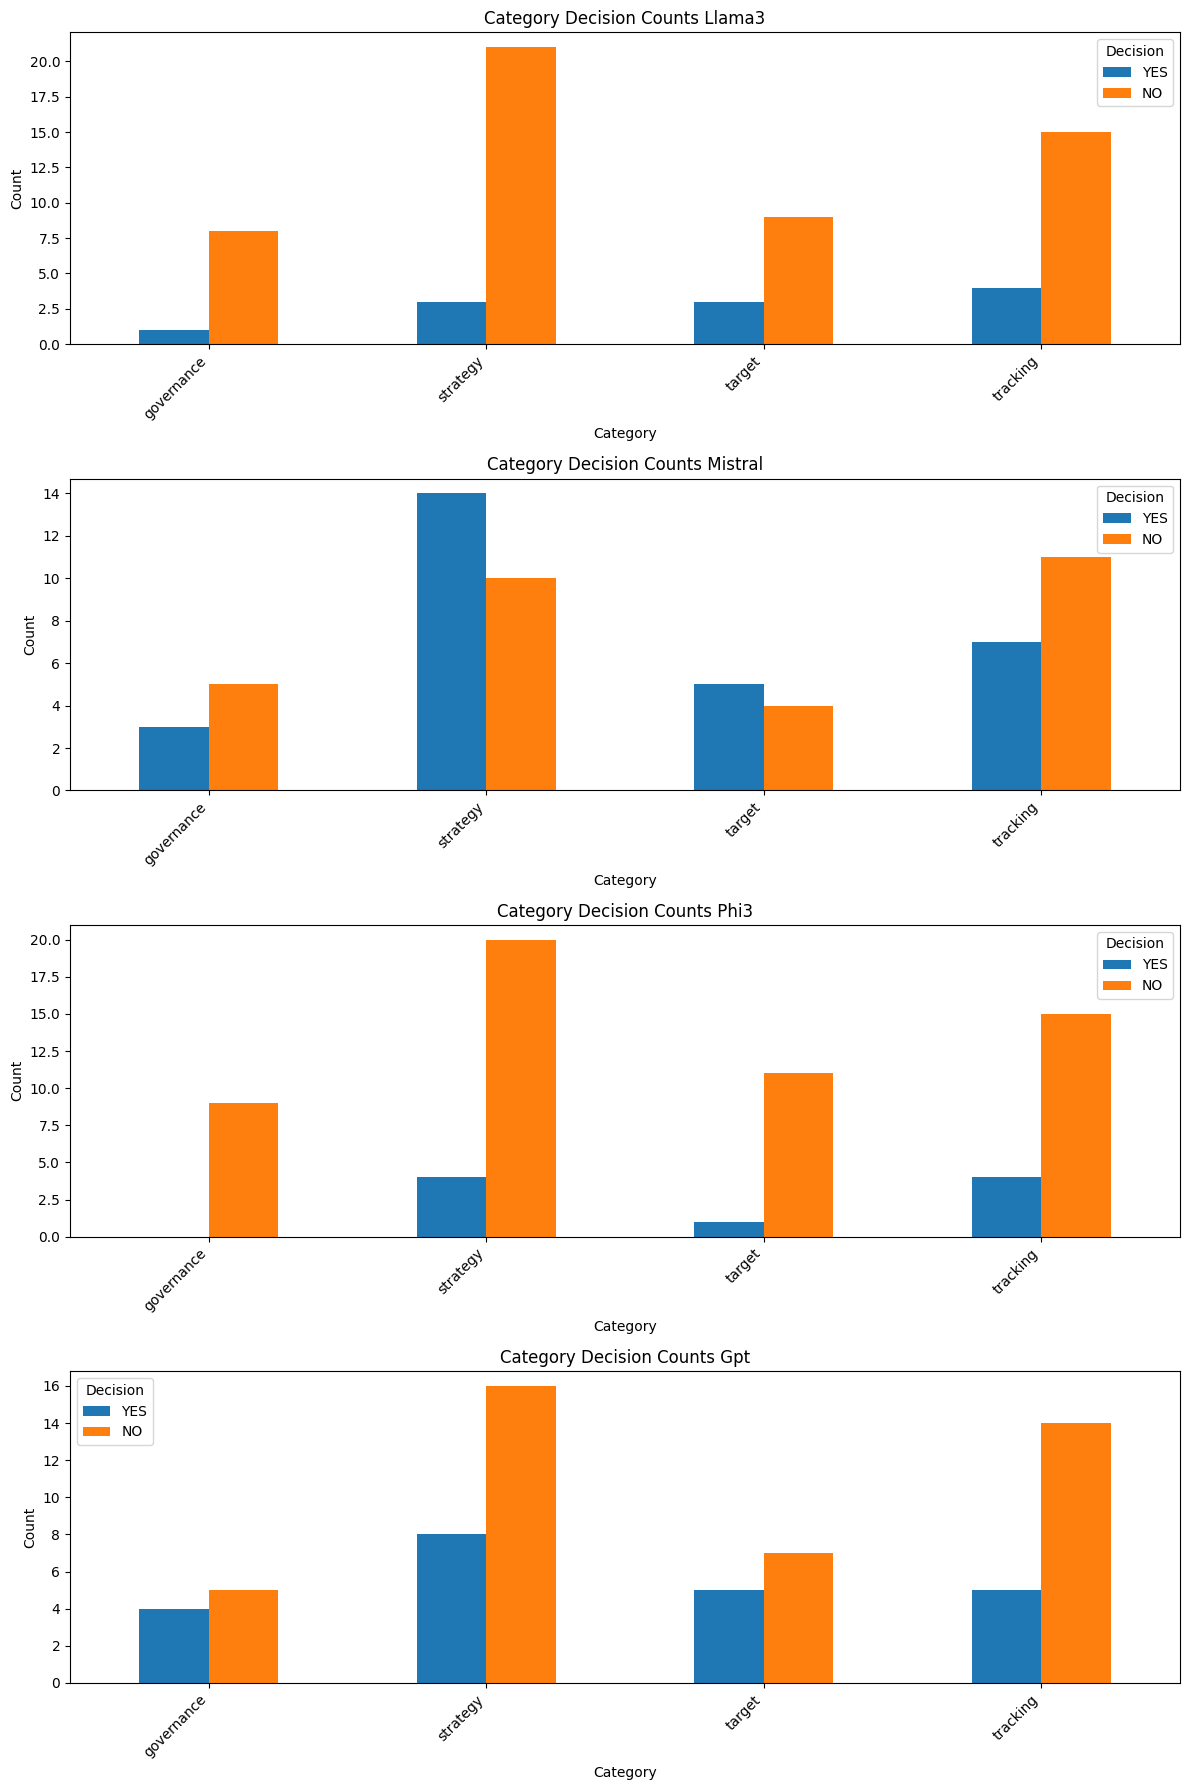

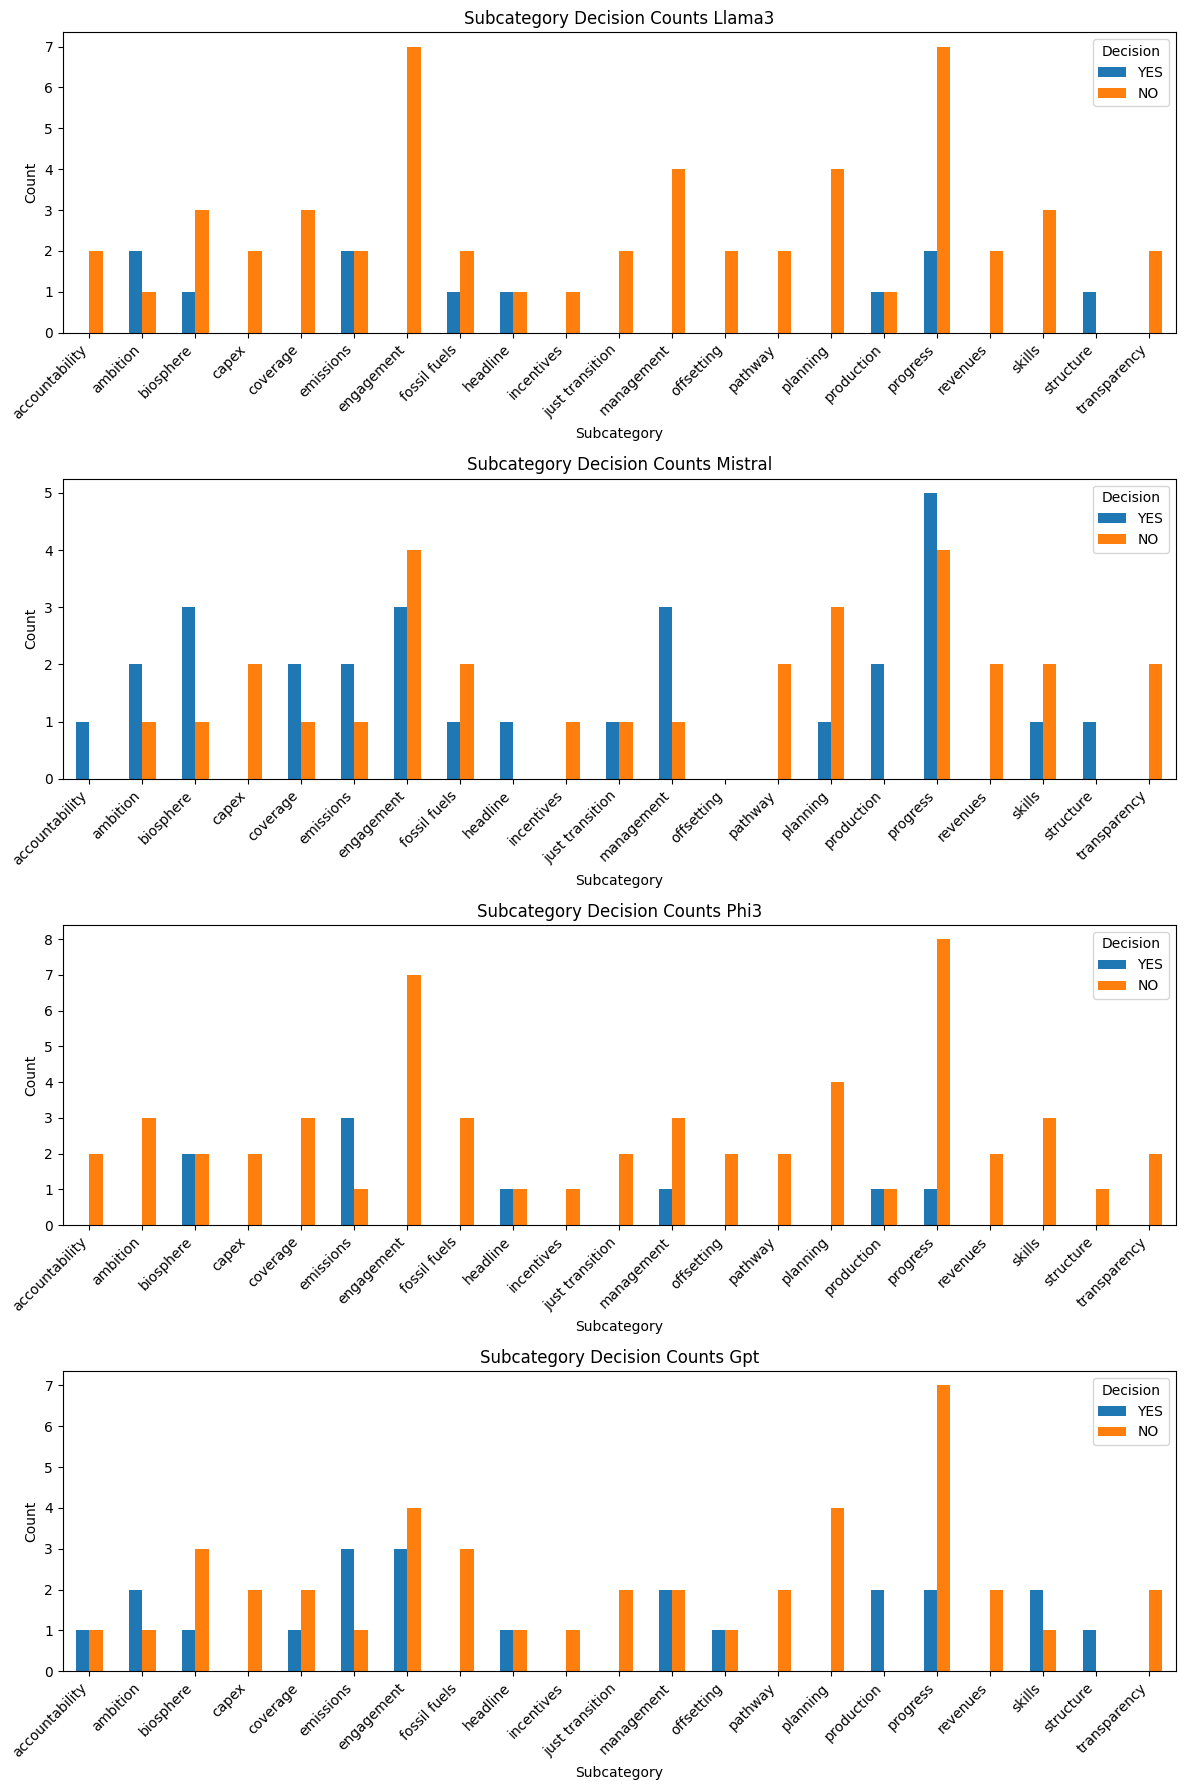

In [42]:
def plot_counts(data, title, ax, column_name, order):
    yes_counts = data[[column_name, "decision"]][data["decision"] == "YES"][column_name].value_counts()
    no_counts = data[[column_name, "decision"]][data["decision"] == "NO"][column_name].value_counts()

    counts_df = pd.DataFrame({
        "YES": yes_counts,
        "NO": no_counts
    })

    counts_df = counts_df.reindex(order)

    counts_df.plot(kind="bar", ax=ax)
    ax.set_title(title)
    ax.set_xlabel(column_name.capitalize())
    ax.set_ylabel("Count")
    ax.set_xticks(range(len(order)))
    ax.set_xticklabels(order, rotation=45, ha="right")
    ax.legend(title="Decision")

all_categories = sorted(llama3["category"].unique())
all_subcategories = sorted(llama3["subcategory"].unique())

fig, axes = plt.subplots(4, 1, figsize=(12, 18))
plot_counts(llama3, "Category Decision Counts Llama3", axes[0], "category", all_categories)
plot_counts(mistral, "Category Decision Counts Mistral", axes[1], "category", all_categories)
plot_counts(phi3, "Category Decision Counts Phi3", axes[2], "category", all_categories)
plot_counts(gpt, "Category Decision Counts Gpt", axes[3], "category", all_categories)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(4, 1, figsize=(12, 18))
plot_counts(llama3, "Subcategory Decision Counts Llama3", axes[0], "subcategory", all_subcategories)
plot_counts(mistral, "Subcategory Decision Counts Mistral", axes[1], "subcategory", all_subcategories)
plot_counts(phi3, "Subcategory Decision Counts Phi3", axes[2], "subcategory", all_subcategories)
plot_counts(gpt, "Subcategory Decision Counts Gpt", axes[3], "subcategory", all_subcategories)
plt.tight_layout()
plt.show()

# Source text Simularity

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def calculate_similarity(main_dataset, ground_truth, dataset_name):
    all_texts = pd.concat([main_dataset['answer'], ground_truth['answer']])

    vectorizer = TfidfVectorizer(min_df=1, stop_words="english")
    tfidf_matrix = vectorizer.fit_transform(all_texts)

    main_dataset_tfidf = tfidf_matrix[:len(main_dataset)]
    ground_truth_tfidf = tfidf_matrix[len(main_dataset):]

    cosine_similarities = cosine_similarity(main_dataset_tfidf, ground_truth_tfidf)

    diagonal_values = np.diagonal(cosine_similarities)

    main_dataset[f"gt_similarity_{dataset_name}"] = diagonal_values

    return main_dataset

llama3 = calculate_similarity(llama3, gpt, "llama3")
llama2 = calculate_similarity(llama2, gpt, "llama2")
phi3 = calculate_similarity(phi3, gpt, "phi3")
mistral = calculate_similarity(mistral, gpt, "mistral")

llama3["gt_similarity_llama3"] = llama3.get("gt_similarity_llama3", pd.Series(dtype=float))
llama2["gt_similarity_llama2"] = llama2.get("gt_similarity_llama2", pd.Series(dtype=float))
phi3["gt_similarity_phi3"] = phi3.get("gt_similarity_phi3", pd.Series(dtype=float))
mistral["gt_similarity_mistral"] = mistral.get("gt_similarity_mistral", pd.Series(dtype=float))

similarity_df = pd.DataFrame({
    "llama3": llama3["gt_similarity_llama3"],
    "llama2": llama2["gt_similarity_llama2"],
    "phi3": phi3["gt_similarity_phi3"],
    "mistral": mistral["gt_similarity_mistral"]
})

similarity_df.sample(10)

,llama3,llama2,phi3,mistral
47,0.422163,0.388342,0.363086,0.423534
0,0.467785,0.426026,0.451384,0.355946
59,0.524504,0.141677,0.609741,0.401287
9,0.557026,0.476335,0.567535,0.446673
53,0.468690,0.352541,0.515897,0.649435
20,0.608179,0.559822,0.535410,0.674409
34,0.633314,0.429059,0.532333,0.551523
22,0.186589,0.264091,0.366078,0.452450
28,0.402506,0.473010,0.412692,0.509286
5,0.580953,0.348895,0.449452,0.529759


In [44]:
def get_mean(ds):
    cols = ds.columns
    avg_list = {}
    for col in cols:
        num_zero = len(ds[ds[col] == 0.0])
        col_sum = ds[col].sum()
        avg = col_sum / (len(ds[col]) - num_zero)
        avg_list[col] = avg
    
    return avg_list

In [45]:
print(get_mean(similarity_df))

{'llama3': 0.46721249172540363, 'llama2': 0.38378771849280124, 'phi3': 0.4574280061915655, 'mistral': 0.4506976214850707}


In [46]:
similarity_df['highest_score_column'] = similarity_df.idxmax(axis=1)
highest_count = similarity_df['highest_score_column'].value_counts()
highest_count

highest_score_column
phi3       22
llama3     20
mistral    15
llama2      7
Name: count, dtype: int64

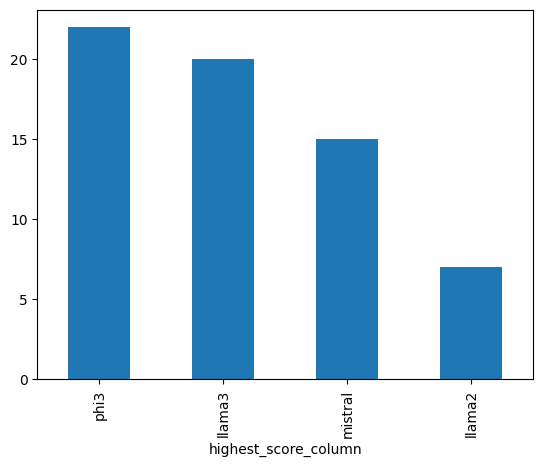

In [47]:
highest_count.plot(kind="bar")
plt.savefig('./highest_count_hm.jpg')

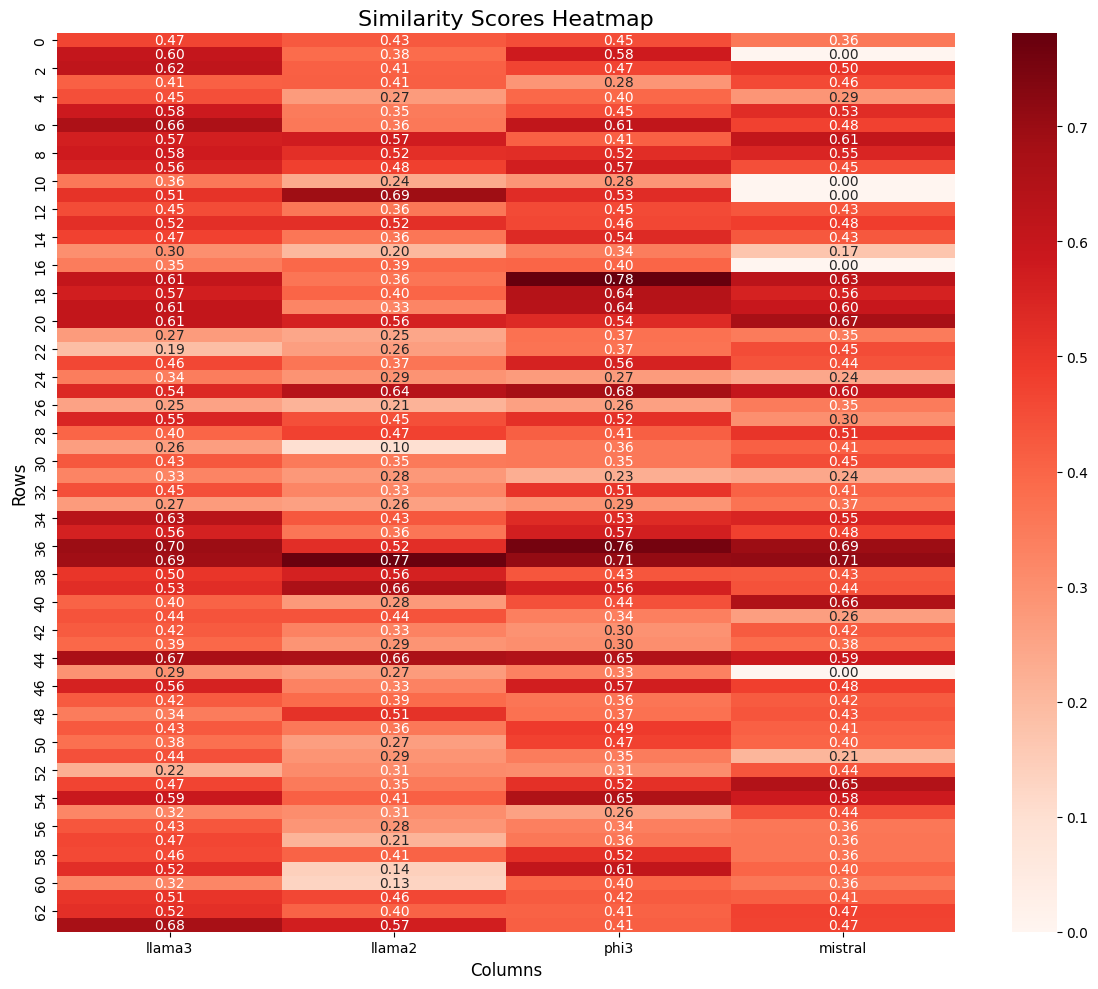

In [48]:
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(similarity_df.iloc[:, :-1], annot=True, cmap="Reds", fmt=".2f", cbar=True)

plt.title("Similarity Scores Heatmap", fontsize=16)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Rows", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()